In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') #statistical graphics style
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',None) # no limit on the width of column names
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
data = pd.read_csv("Retail.csv") #data frame
data.head(3) #displays first three rows for the df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0000,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0000,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0000,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200


In [3]:
data.info() #concise summary of the dataframe's strc. and informartion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
data=data.drop("Customer ID", axis=1) #deleting the column with name 'Customer ID'

In [5]:
data = data.drop("Customer Name", axis=1)
data = data.drop("Country", axis=1)
data = data.drop("Postal Code", axis=1)
data = data.drop("Product ID", axis=1)

In [6]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200


In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y') #converts 'Order Date' into datetime format.
data['month']=data['Order Date'].dt.month # creates a new column with month.
data['year']=data['Order Date'].dt.year # creates a new column with year.
data['year_month']=data['Order Date'].dt.to_period('M') # frequency of M (months)

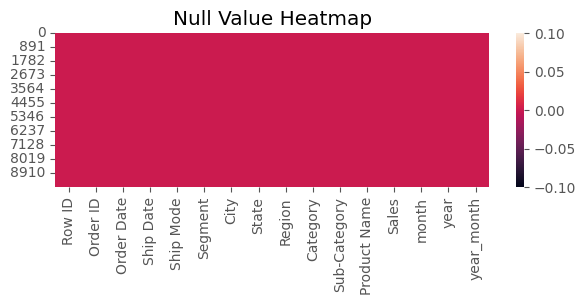

In [8]:
plt.figure(figsize=(7,2)) # 7 inch wide, 2 inch height
plt.title("Null Value Heatmap")
sns.heatmap(data.isnull()) # uses seaborn library to create a heatmap. data.isnull() creates a boolean df (true=missing)
plt.show()

In [9]:
#this confirms that no missuing values are present in the data-set.

In [10]:
print('The following shows descriptive statistics on numeric data.\n This can also reveal potential errors with the data.')
data.describe()

The following shows descriptive statistics on numeric data.
 This can also reveal potential errors with the data.


,Row ID,Order Date,Sales,month,year
count,9800.0000,9800,9800.0000,9800.0000,9800.0000
mean,4900.5000,2017-05-01 05:13:51.673469440,230.7691,7.8185,2016.7242
min,1.0000,2015-01-03 00:00:00,0.4440,1.0000,2015.0000
25%,2450.7500,2016-05-24 00:00:00,17.2480,5.0000,2016.0000
50%,4900.5000,2017-06-26 00:00:00,54.4900,9.0000,2017.0000
75%,7350.2500,2018-05-15 00:00:00,210.6050,11.0000,2018.0000
max,9800.0000,2018-12-30 00:00:00,22638.4800,12.0000,2018.0000
std,2829.1607,NaN,626.6519,3.2819,1.1240


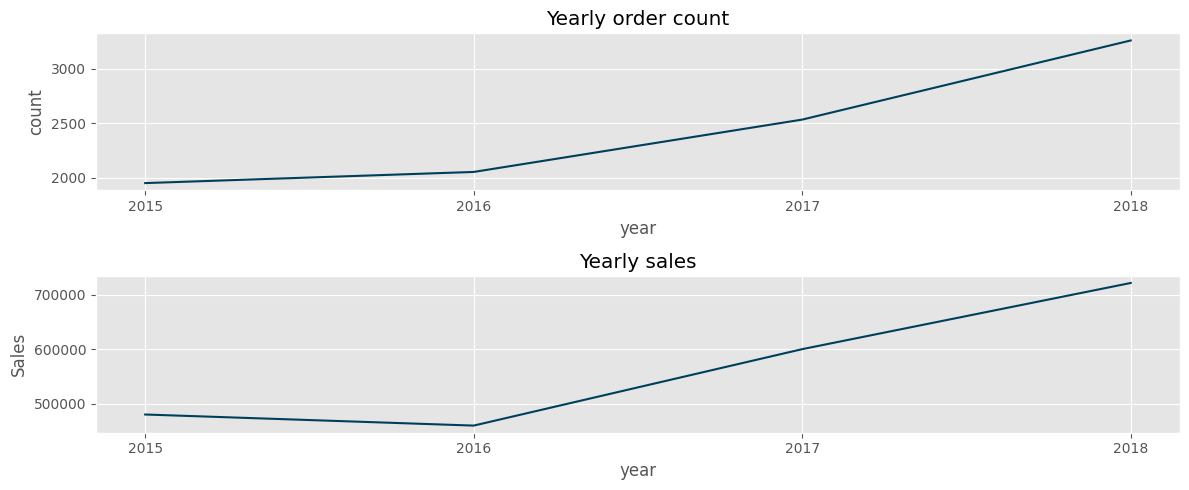

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(211) # grid of 2 rows, 1 column and 1st subplot in the grid.
data.groupby(['year'])['Order Date'].count().plot(c='#003f5c') # num of orders for each year and plots bar chart.
plt.ylabel('count')
plt.xticks(data.groupby(['year'])['Order Date'].count().index) #x axis tick labels 
plt.title('Yearly order count')

plt.subplot(212) # grid of 2 rows, 1 column and 2nd subplot in the grid.
data.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(data.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout() #adjust spacing and margins
plt.show()

In [12]:
print('Annual total sales: ')
data.groupby('year')['Sales'].sum() # groups data wrt year col and calcs the sum of the total sales

Annual total sales: 


year
2015   479856.2081
2016   459436.0054
2017   600192.5500
2018   722052.0192
Name: Sales, dtype: float64

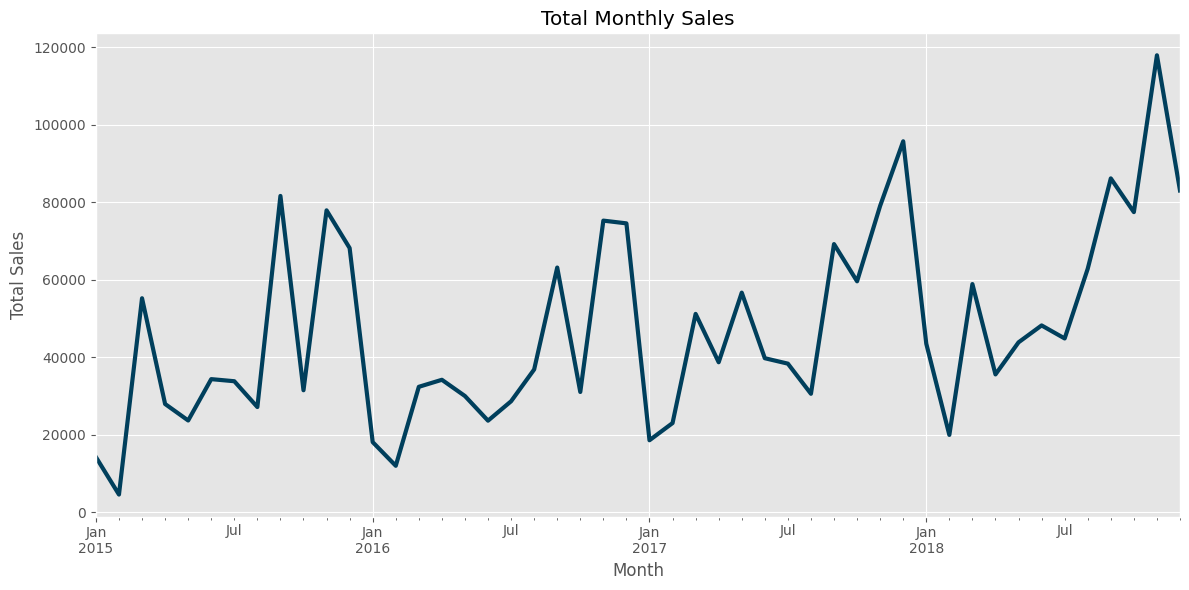

In [13]:
data.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=3,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

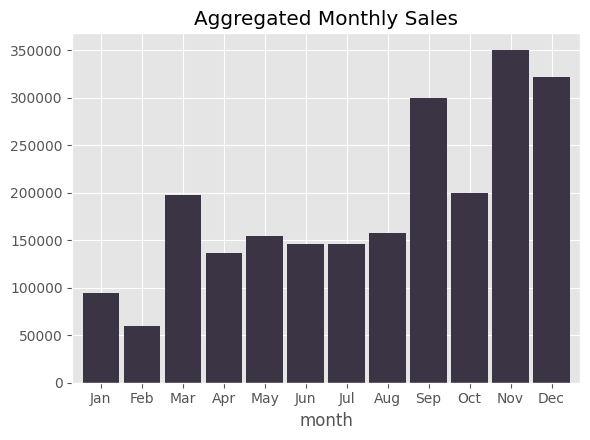

In [14]:
data.groupby('month')['Sales'].sum().plot(kind='bar',color='#3a3445',figsize=(6,4.5),width=.89)
plt.title('Aggregated Monthly Sales')
plt.xticks(ticks=np.arange(0,12,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)

plt.tight_layout()
plt.show()

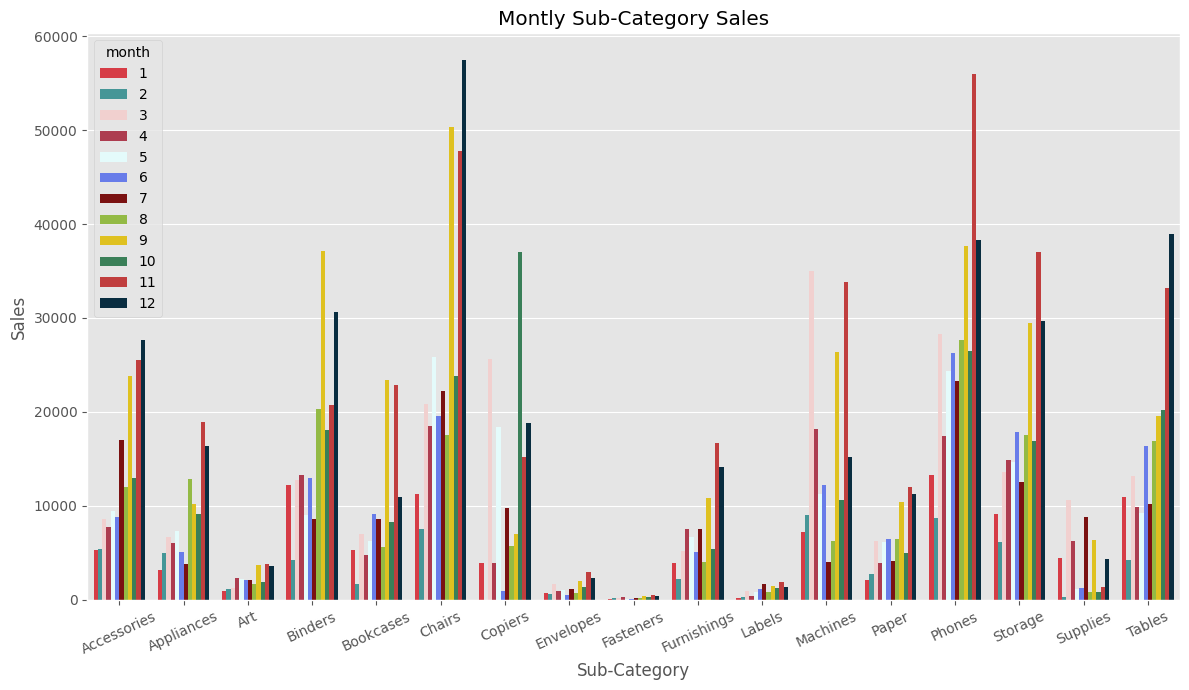

In [15]:
month_subcat=pd.DataFrame(data.groupby(['month','Sub-Category'])['Sales'].sum().reset_index()) # reset_index converts
#the grouped result back to regular df.
month_subcat

plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat,\
            x='Sub-Category',\
            y='Sales',\
            hue='month', 
            palette=["#F02230", "#38A3A5", "#F7CAC9",\
                     "#C02942", "#E0FFFF", "#536DFE",\
                     "#8B0000", "#9ACD32", "#FFD700",\
                     "#2E8B57",'#d62828','#003049'])
plt.title('Montly Sub-Category Sales')
plt.xticks(rotation=25) #rotates x axis tick variables by 25 deg to prevent overlap

plt.tight_layout() #adjust spacing and avoid overlapping

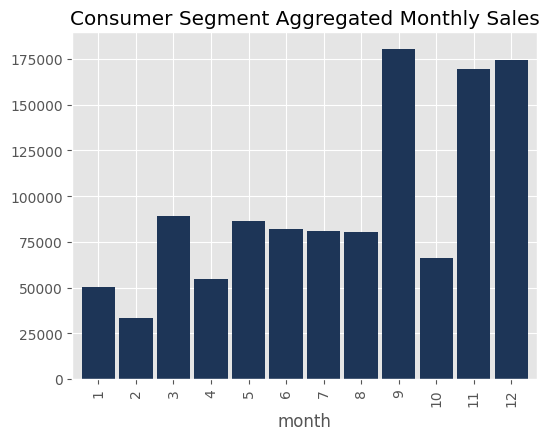

In [16]:
data.query('Segment == "Consumer"').groupby('month')['Sales'].sum().plot(kind='bar',\
                                                                         figsize=(6,4.5),\
                                                                         width=.89,\
                                                                         color='#1d3557')
plt.title('Consumer Segment Aggregated Monthly Sales')
plt.show()

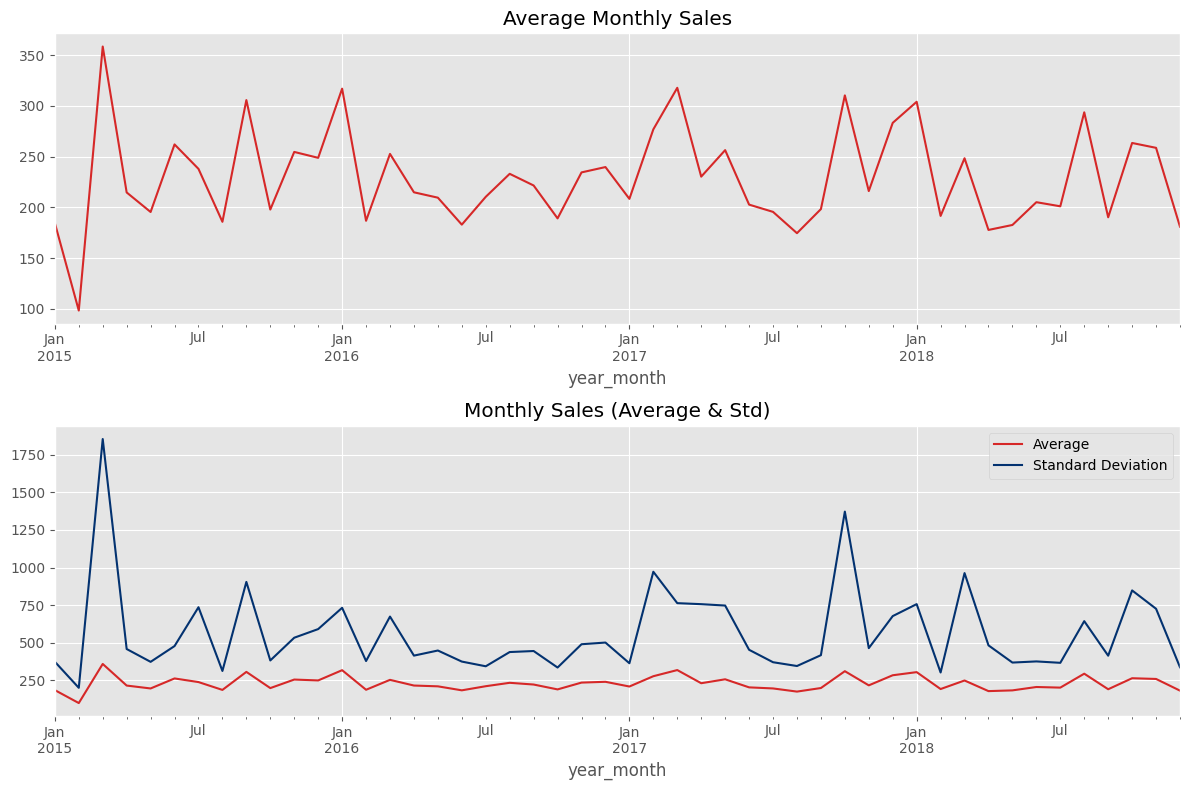

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(211)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
plt.title('Average Monthly Sales')

plt.subplot(212)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
data.groupby('year_month')['Sales'].describe()['std'].plot(linewidth=1.5,color='#033270')
plt.title('Monthly Sales (Average & Std)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

**Key findings:**

-> Yearly sales had been growing during the 4 year period. Growth was slowest in 2016 and fastest in 2017.

-> Seasonal trends can be observed with sales. Sales generally increase towards the end of the year - November and December (holidays) and in September (possibly due to the opening of schools. Sales under consumer segment also incrased during these months. Increase in school and office supplies sales was also observed).

-> Sales had been very variable especially in March and around September and October. No significant variability was observed from April 2016, until the end of the year.

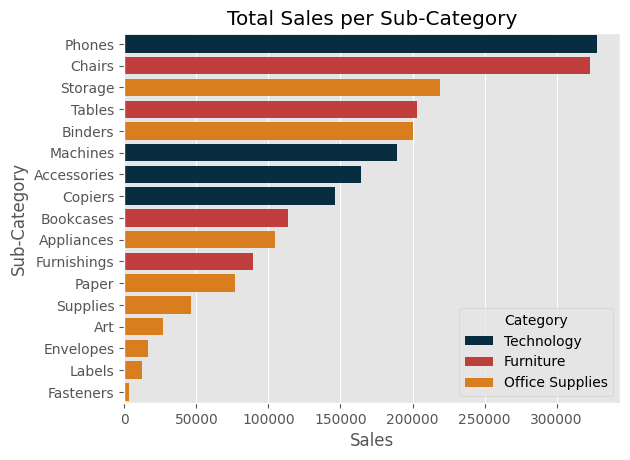

In [18]:
df_sales=pd.DataFrame(data.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales',ascending=False)

sns.barplot(x='Sales',y='Sub-Category',data=df_sales,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Total Sales per Sub-Category')

plt.show()

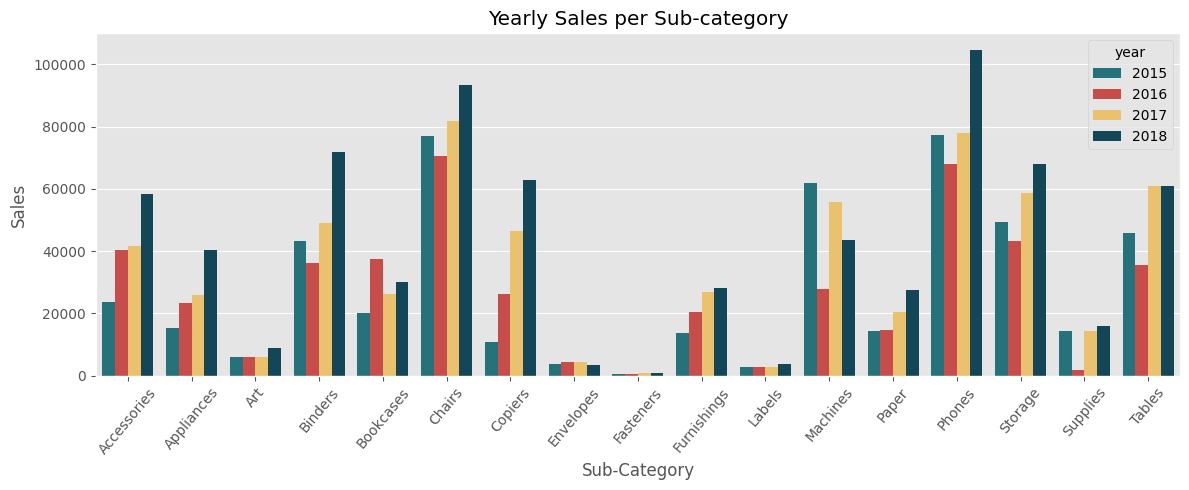

In [19]:
yearly_sales=pd.DataFrame(data.groupby(['Sub-Category','year'])['Sales'].sum()).reset_index()
yearly_sales

plt.figure(figsize=(12,5))
sns.barplot(data=yearly_sales,x='Sub-Category',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50)
plt.title('Yearly Sales per Sub-category')

plt.tight_layout()
plt.show()

In [20]:
yearly_sales['yearly_growth_rate'] = yearly_sales.groupby('Sub-Category')['Sales'].pct_change() * 100
print('Sales Annual Average Growth Rate:')
pd.DataFrame(yearly_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values(ascending=False))

Sales Annual Average Growth Rate:


,yearly_growth_rate
Sub-Category,
Supplies,192.8448
Copiers,84.6718
Appliances,39.9276
Accessories,37.6381
Furnishings,28.7889
Paper,25.4131
Bookcases,23.8065
Binders,21.8736
Art,16.6056


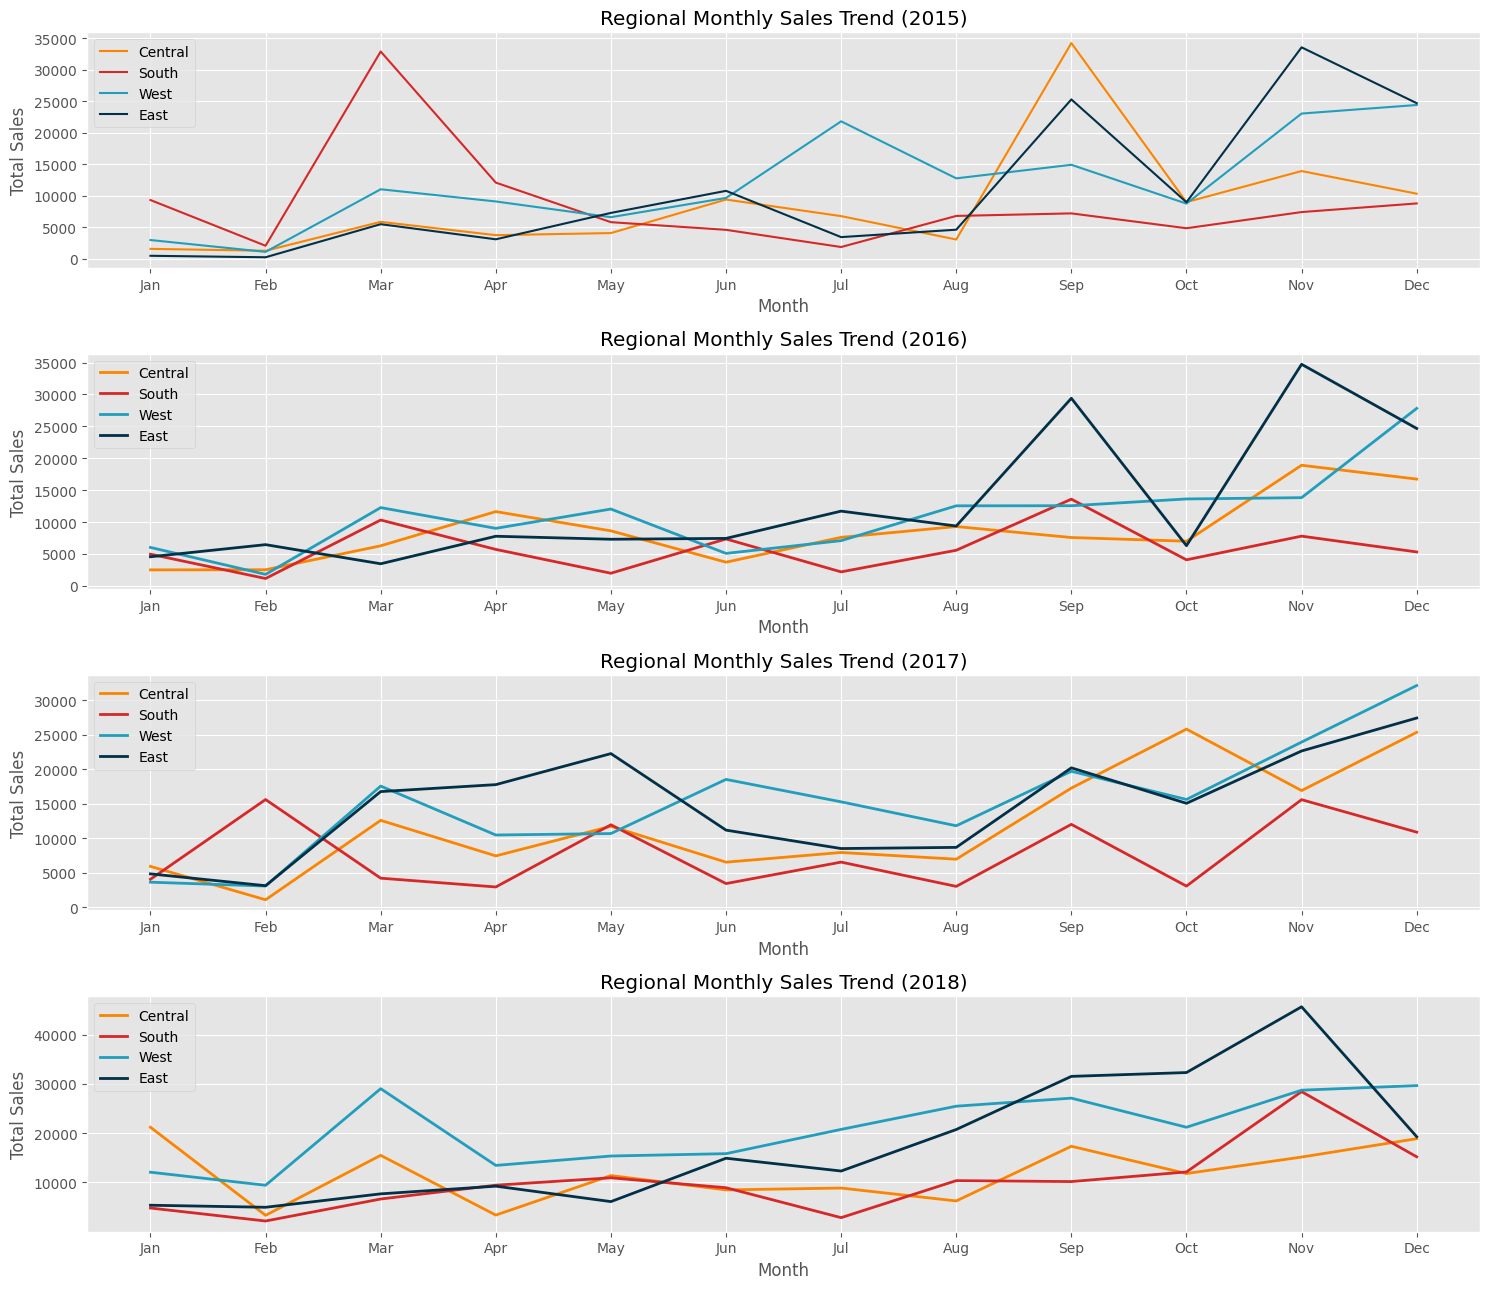

In [21]:
data11=data.query('year == 2015')
data12=data.query('year == 2016')
data13=data.query('year == 2017')
data14=data.query('year == 2018')

plt.figure(figsize=(15,13))

plt.subplot(411)
data11.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=1.5)
data11.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=1.5)
data11.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=1.5)
data11.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=1.5)

plt.title('Regional Monthly Sales Trend (2015)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(412)
data12.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data12.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data12.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data12.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2016)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(413)
data13.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data13.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data13.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data13.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2017)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(414)
data14.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data14.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data14.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data14.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.tight_layout()
plt.show()

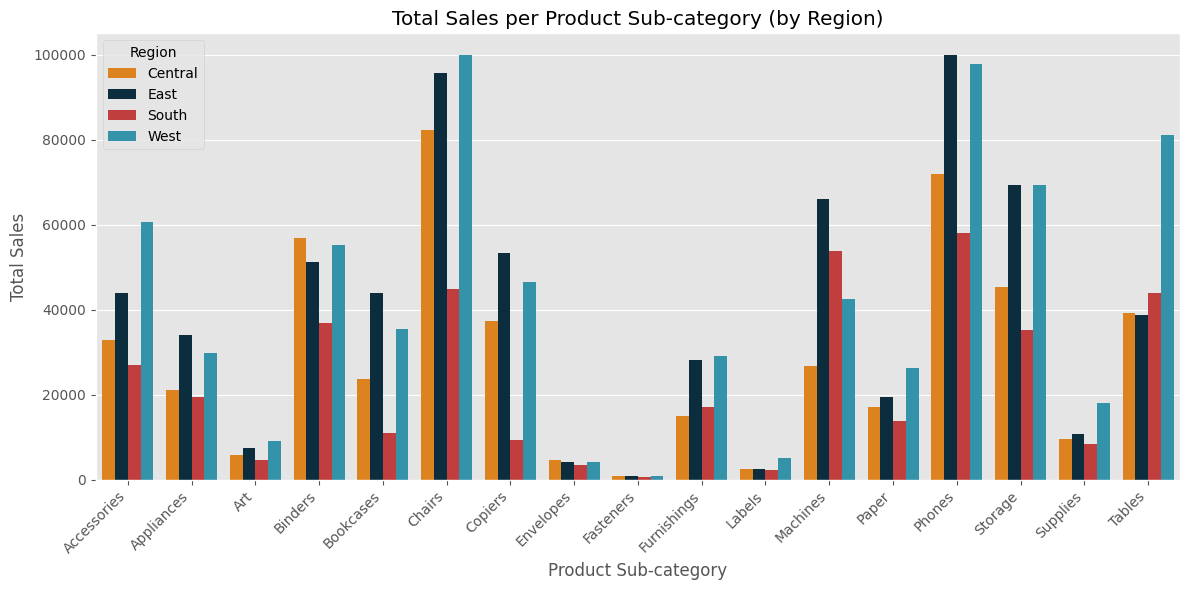

In [22]:
reg_sub=pd.DataFrame(data.groupby(['Region','Sub-Category'])['Sales'].sum()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=reg_sub, x='Sub-Category', y='Sales', hue='Region',palette=['#fb8500','#023047','#d62828','#219ebc'])
plt.xlabel('Product Sub-category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Sub-category (by Region)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

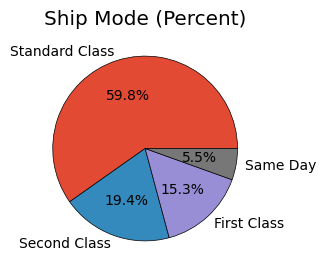

In [23]:
i3=data['Ship Mode'].value_counts()/len(data)*100
i3

plt.figure(figsize=(5,3))
plt.pie(i3,labels=i3.index,autopct='%.1f%%',textprops={'fontsize':10},wedgeprops={'edgecolor': 'black'})
plt.title('Ship Mode (Percent)')

plt.show()

In [24]:
print('Annual Average Transaction Value (nominal):')

av_tv=pd.DataFrame(data.groupby('year')['Sales'].sum() / data['Order ID'].nunique()) #avg transactions each year/ count no.
# of unique ID's
av_tv['change'] = av_tv['Sales'].pct_change() * 100 # percent change in the sales column compared to previous value.
av_tv

Annual Average Transaction Value (nominal):


,Sales,change
year,,
2015,97.4921,NaN
2016,93.3434,-4.2555
2017,121.9408,30.6368
2018,146.6989,20.3034


Summarized below are the key findings from this analysis. Throughout the 4-year period from 2015 to 2018:

**Sales Performance**

Superstore sales increased yearly, with the fastest growth in 2017 and the slowest in 2016.
Seasonal sales trends was observed, notably in November, December, and September.
Sales exhibited high variability, particularly in March, September, and October.

**Product Categories**

Phones, chairs, and storage products led in sales by category, while copiers, furnishings, and fasteners performed least.
No clear sales pattern emerged for product sub-categories.
Supplies (technology), copiers, and appliances experienced the highest average annual sales growth, while envelopes, chairs, and machine products grew the slowest.

**Geographical Insights**

Seasonal trends were consistent in all regions, with higher sales in the West and East.
Sales varied among regions, with office supplies and technology products excelling in the West and East.
Most regions had negative growth in 2016, except for Central region.
The West had the fastest average annual growth rate, followed by East, Central, and the South.